<a href="https://colab.research.google.com/github/jorgenery/ufba-mestrado/blob/main/ic0004_trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import itertools
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Implementação Algoritmos

### Algoritmo de Força Bruta

In [121]:
from itertools import permutations

def calcular_distancia(rota, distancias):
    return (
        sum(distancias[rota[i]][rota[i + 1]] for i in range(len(rota) - 1))
        + distancias[rota[-1]][rota[0]]
    )

def forca_bruta(distancias, distancia_maxima):
    cidades = list(range(len(distancias)))
    melhor_rota = None
    menor_distancia = float('inf')
    
    for rota in permutations(cidades):
        distancia_atual = calcular_distancia(rota, distancias)
        if distancia_atual <= distancia_maxima and distancia_atual < menor_distancia:
            menor_distancia = distancia_atual
            melhor_rota = rota
    
    return melhor_rota, menor_distancia if melhor_rota else None

### Algoritmo do Vizinho Mais Próximo

In [122]:
# Algoritmo do Vizinho Mais Próximo
def vizinho_mais_proximo(matriz_distancias, cidade_inicial=0, distancia_maxima=float('inf')):
    n = len(matriz_distancias)
    visitadas = [False] * n
    rota = [cidade_inicial]
    distancia_total = 0

    cidade_atual = cidade_inicial
    visitadas[cidade_atual] = True

    for _ in range(n - 1):
        # Encontra a próxima cidade com a menor distância, não visitada
        proxima_cidade = np.argmin([matriz_distancias[cidade_atual][j] if not visitadas[j] else float('inf') for j in range(n)])
        distancia_para_proxima = matriz_distancias[cidade_atual][proxima_cidade]

        # Verifica se adicionar a próxima cidade excede a distância máxima
        if distancia_total + distancia_para_proxima > distancia_maxima:
            return None, None

        distancia_total += distancia_para_proxima
        rota.append(proxima_cidade)
        visitadas[proxima_cidade] = True
        cidade_atual = proxima_cidade

    # Adiciona a distância de volta para a cidade inicial
    distancia_final = matriz_distancias[cidade_atual][cidade_inicial]

    if distancia_total + distancia_final > distancia_maxima:
        return None, None

    distancia_total += distancia_final
    rota.append(cidade_inicial)

    return rota, distancia_total

### Algoritmo Held Karp

In [123]:
def held_karp(distances, max_distance):
    n = len(distances)
    C = {}

    for k in range(1, n):
        C[(1 << k, k)] = (distances[0][k], 0)

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + distances[m][k], m))
                C[(bits, k)] = min(res)

    bits = (2**n - 1) - 1
    res = []
    routes = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + distances[k][0], k))
        routes.append(C[(bits, k)][1])
    opt, parent = min(res)

    return routes,opt

### Valida certificado

In [124]:
# Valida certificado
def calculate_distance(route, distances):
    return sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)) + distances[route[-1]][route[0]]

### Comparação de Eficiência

In [125]:
def executar_forca_bruta(dist_matrix, max_distance):
    # Algoritmo de Força Bruta
    start_time = time.time()
    rota, distancia = forca_bruta(dist_matrix, max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Força bruta", distancia, tempo, rota, quantidade_cidades ]

def executar_vizinho_mais_proximo(dist_matrix, max_distance):
    # Algoritmo do Vizinho Mais Próximo
    start_time = time.time()
    rota, distancia = vizinho_mais_proximo(dist_matrix,cidade_inicial=0,distancia_maxima=max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Vizinho Mais Próximo", distancia, tempo, rota, quantidade_cidades ]

def executar_held_karp(dist_matrix, max_distance):
    # Algoritmo held_karp
    start_time = time.time()
    rota, distancia = held_karp(dist_matrix, max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Held-Karp", distancia, tempo, rota, quantidade_cidades ]

## Experimentos

In [146]:
# Matriz de Distancias Cidades
# Fonte: https://www.melhoresrotas.com/tabela-de-distancias-entre-cidades/br-bahia/
distancias = [
    # Salvador, Feira de Santana, Itabuna, Juazeiro, Camaçari, Barreiras, Ilhéus, Lauro de Freitas, Teixeira de Freitas, Jequié, Porto Seguro, Alagoinhas, Simões Filho, Eunápolis, Paulo Afonso
    [0, 112, 433, 505, 46, 861, 449, 24, 806, 367, 707, 112, 25, 645, 457],  # Salvador
    [115, 0, 348, 394, 98, 748, 364, 110, 721, 254, 623, 75, 89, 560, 377],  # Feira de Santana
    [436, 348, 0, 741, 419, 942, 30, 431, 376, 187, 277, 396, 409, 215, 724],  # Itabuna
    [508, 393, 743, 0, 491, 935, 759, 503, 1_116, 645, 1_017, 445, 482, 955, 364],  # Juazeiro
    [50, 98, 419, 491, 0, 847, 435, 30, 792, 353, 693, 80, 24, 631, 425],  # Camaçari
    [863, 748, 942, 936, 846, 0, 957, 858, 1_185, 793, 1_086, 823, 837, 1_024, 1_124],  # Barreiras
    [452, 364, 30, 757, 435, 955, 0, 447, 405, 203, 307, 412, 426, 244, 740],  # Ilhéus
    [26, 108, 429, 501, 31, 857, 444, 0, 802, 363, 703, 108, 21, 641, 453],  # Lauro de Freitas
    [809, 721, 376, 1_114, 792, 1_185, 405, 804, 0, 560, 225, 769, 783, 163, 1_098],  # Teixeira de Freitas
    [369, 254, 187, 647, 352, 792, 203, 364, 560, 0, 461, 329, 343, 399, 630],  # Jequié
    [711, 623, 277, 1_016, 694, 1_087, 307, 706, 225, 462, 0, 671, 684, 63, 999],  # Porto Seguro
    [116, 76, 396, 446, 77, 824, 412, 105, 769, 330, 670, 0, 88, 608, 346],  # Alagoinhas
    [28, 89, 410, 482, 21, 838, 425, 22, 783, 344, 684, 88, 0, 622, 433],  # Simões Filho
    [648, 560, 214, 953, 631, 1_024, 244, 643, 163, 399, 62, 608, 622, 0, 936],  # Eunápolis
    [462, 378, 728, 367, 423, 1_124, 744, 451, 1_101, 630, 1_002, 347, 434, 940, 0]  # Paulo Afonso
    ]

cidades = [
    "Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas",
    "Jequié", "Porto Seguro", "Alagoinhas", "Simões Filho", "Eunápolis", "Paulo Afonso"
    ]

def get_submatrix(cidades_selecionadas, cidades, distancias):
    """
    Monta a matriz de distância das cidades selecionadas
    """
    # Verificar se todas as cidades estão na lista
    for cidade in cidades_selecionadas:
        if cidade not in cidades:
            raise ValueError(f"A cidade '{cidade}' não está na lista de cidades.")

    # Obter os índices das cidades selecionadas
    indices = [cidades.index(cidade) for cidade in cidades_selecionadas]

    # Criar a submatriz
    submatriz = []
    for i in indices:
        linha = [distancias[i][j] for j in indices]
        submatriz.append(linha)

    return submatriz

lista_roteiros = [
    ["Salvador", "Feira de Santana", "Itabuna"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas"],
    #["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro"],
    #["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis"],
    #["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié"],
    #["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié", "Paulo Afonso"]
]

matriz_resultados = [] # Matriz de Resultados para comparação

# Exibe Resultados
def resultados(matriz_comparacao):
    # Resultados
    for d in matriz_comparacao:
      if d[1] == None or d[1]==0:
        print(f"{d[0]}: Nenhuma resposta valida")
      else:
        print(f"Algoritmo - {d[0]}\t: \tDistância = {d[1]} km \tTempo = {d[2]:.32f} s, \tRota = {d[3]}")

# Testa Resultados
def test_execution(lista_roteiros, algoritmo):
    max_distance = 9800 # Distancia Maxima
    matriz_comparacao = []
    for roteiro in lista_roteiros:
        matriz_roteiro = get_submatrix(roteiro, cidades, distancias)
        dado = algoritmo(matriz_roteiro, max_distance)
        matriz_comparacao.append(dado)
        matriz_resultados.append(dado)
    resultados(matriz_comparacao)
    


In [162]:
def show_experimentos_tempo(matriz_resultados):
    df = pd.DataFrame(matriz_resultados)

    plt.style.use('Solarize_Light2')  # Usar um estilo estético do Seaborn

    plt.figure(figsize=(12, 7))
    for algoritmo in df[0].unique():
        subset = df[df[0] == algoritmo]
        plt.plot(subset[4], subset[2], marker='o', linestyle='-', label=algoritmo)
    plt.xlabel('Qtd de Cidades', fontsize=12, fontweight='bold')
    plt.ylabel('Tempo de Execução (s)', fontsize=12, fontweight='bold')
    plt.title('Comparação de Tempo de Execução dos Algoritmos', fontsize=14, fontweight='bold')
    plt.ylim(0, 0.02)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Algoritmos', title_fontsize='13', fontsize='11', loc='best')
    plt.tight_layout()
    plt.savefig('experimento.png')
    plt.show()
    
def show_experimentos_solucao(matriz_resultados):
    df = pd.DataFrame(matriz_resultados)

    plt.style.use('Solarize_Light2')  # Usar um estilo estético do Seaborn

    plt.figure(figsize=(12, 7))
    for algoritmo in df[0].unique():
        subset = df[df[0] == algoritmo]
        plt.plot(subset[4], subset[1], marker='o', linestyle='-', label=algoritmo)
    plt.xlabel('Qtd de Cidades', fontsize=12, fontweight='bold')
    plt.ylabel('Custo (s)', fontsize=12, fontweight='bold')
    plt.title('Comparação de soluções Algoritmos', fontsize=14, fontweight='bold')
    #plt.ylim(0, 0.02)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Algoritmos', title_fontsize='13', fontsize='11', loc='best')
    plt.tight_layout()
    plt.savefig('solucao.png')
    plt.show()


In [148]:
test_execution(lista_roteiros, executar_forca_bruta)
test_execution(lista_roteiros, executar_held_karp)
test_execution(lista_roteiros, executar_vizinho_mais_proximo)

Algoritmo - Força bruta	: 	Distância = 896 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 1, 2)
Algoritmo - Força bruta	: 	Distância = 1682 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 2, 3, 1)
Algoritmo - Força bruta	: 	Distância = 1714 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 4, 2, 3, 1)
Algoritmo - Força bruta	: 	Distância = 2894 km 	Tempo = 0.00684118270874023437500000000000 s, 	Rota = (0, 4, 2, 6, 5, 3, 1)
Algoritmo - Força bruta	: 	Distância = 2901 km 	Tempo = 0.05694842338562011718750000000000 s, 	Rota = (0, 2, 6, 5, 3, 1, 4, 7)
Algoritmo - Força bruta	: 	Distância = 3523 km 	Tempo = 0.49437308311462402343750000000000 s, 	Rota = (0, 1, 3, 5, 8, 2, 6, 4, 7)
Algoritmo - Força bruta	: 	Distância = 3524 km 	Tempo = 5.28565669059753417968750000000000 s, 	Rota = (0, 9, 6, 2, 8, 5, 3, 1, 4, 7)
Algoritmo - Força bruta	: 	Distância = 3578 km 	Tempo = 61.36133646965026855468750000000000 s, 	Rota = (0, 9, 6, 2, 8, 5, 3, 1, 10, 4, 7)
Algo

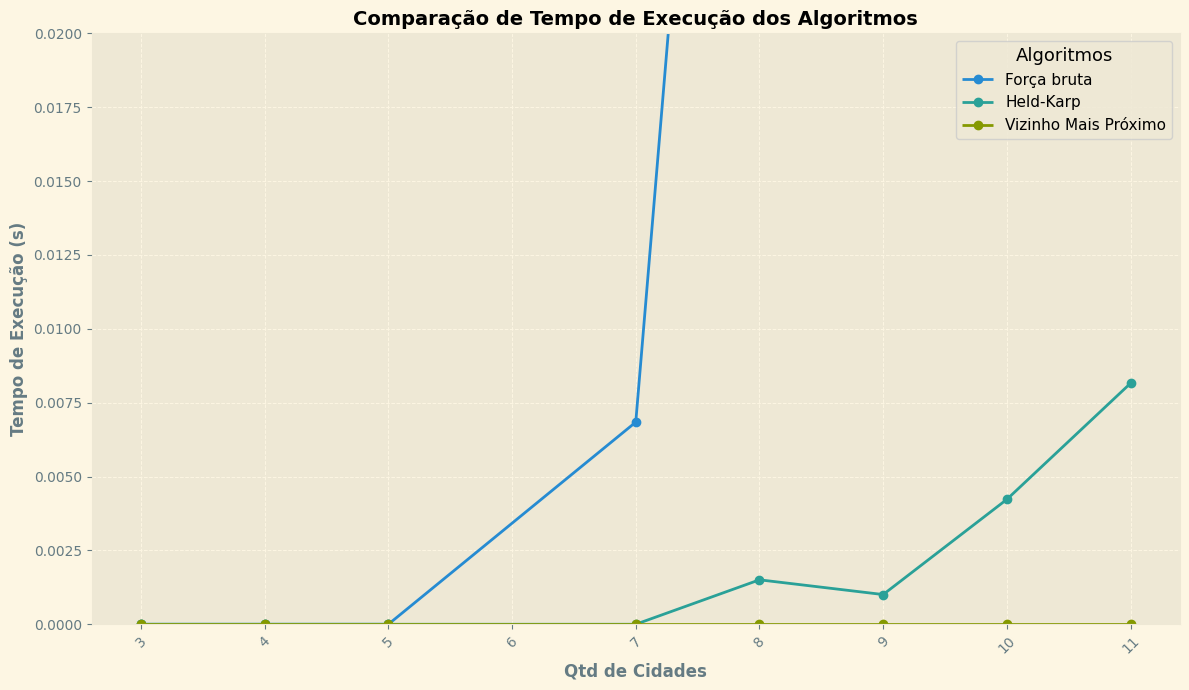

In [163]:
show_experimentos_tempo(matriz_resultados)

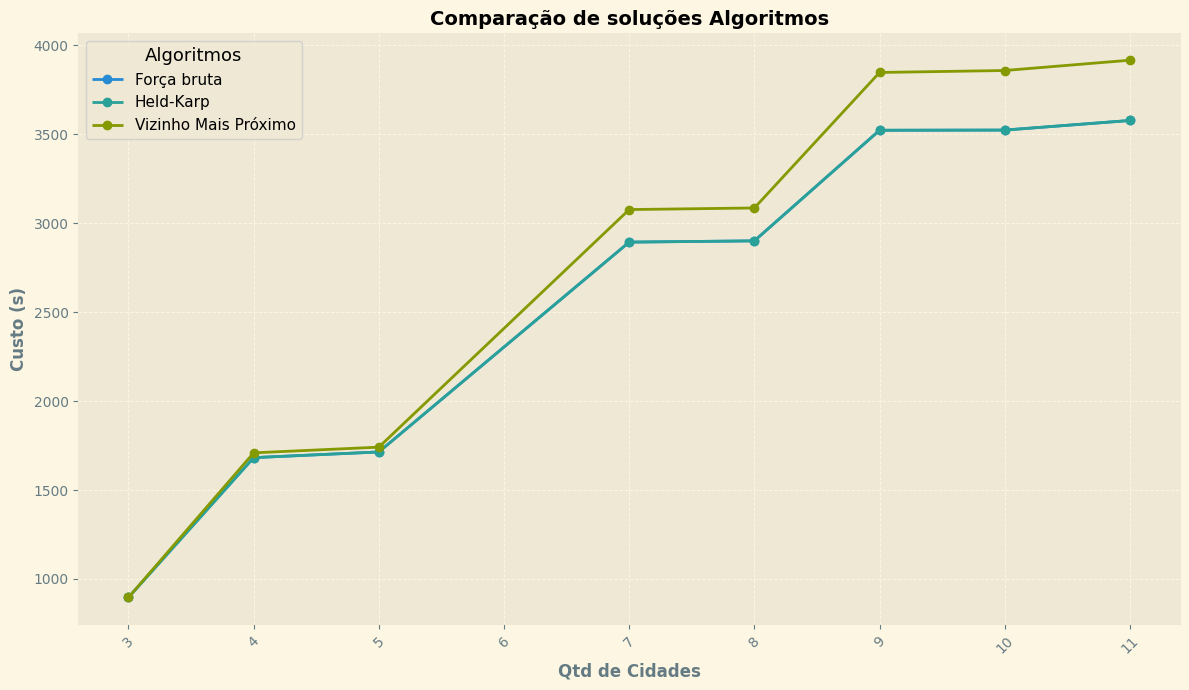

In [164]:
show_experimentos_solucao(matriz_resultados)

In [159]:
# Resultados
for d in matriz_resultados:
  if d[1] == None or d[1]==0:
    print(f"{d[0]}: Nenhuma resposta valida")
  else:
    print(f"{d[0]} \t {d[4]}\t: {d[1]:.32f} s")


Força bruta 	 3	: 896.00000000000000000000000000000000 s
Força bruta 	 4	: 1682.00000000000000000000000000000000 s
Força bruta 	 5	: 1714.00000000000000000000000000000000 s
Força bruta 	 7	: 2894.00000000000000000000000000000000 s
Força bruta 	 8	: 2901.00000000000000000000000000000000 s
Força bruta 	 9	: 3523.00000000000000000000000000000000 s
Força bruta 	 10	: 3524.00000000000000000000000000000000 s
Força bruta 	 11	: 3578.00000000000000000000000000000000 s
Held-Karp 	 3	: 896.00000000000000000000000000000000 s
Held-Karp 	 4	: 1682.00000000000000000000000000000000 s
Held-Karp 	 5	: 1714.00000000000000000000000000000000 s
Held-Karp 	 7	: 2894.00000000000000000000000000000000 s
Held-Karp 	 8	: 2901.00000000000000000000000000000000 s
Held-Karp 	 9	: 3523.00000000000000000000000000000000 s
Held-Karp 	 10	: 3524.00000000000000000000000000000000 s
Held-Karp 	 11	: 3578.00000000000000000000000000000000 s
Vizinho Mais Próximo 	 3	: 896.00000000000000000000000000000000 s
Vizinho Mais Próximo